In [295]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.python.keras import regularizers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy.matlib

In [296]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [297]:
features = pd.read_csv('EI_data.csv')
labelss = pd.read_csv('EI_labels.csv')


In [298]:
features = features.to_numpy()
labelss = labelss.to_numpy()


In [299]:
features

array([[0.00497524, 0.0149554 , 0.00506889, ..., 0.13752379, 0.7211063 ,
        0.88957389],
       [0.0050106 , 0.01494963, 0.00504523, ..., 0.1374417 , 0.72101828,
        0.88959629],
       [0.00505418, 0.01490302, 0.00502486, ..., 0.13739678, 0.72111671,
        0.8896793 ],
       ...,
       [0.13494305, 0.10681864, 0.01197126, ..., 0.14130183, 0.71136518,
        0.88188638],
       [0.13635318, 0.10677534, 0.01185567, ..., 0.1414056 , 0.71265973,
        0.88242909],
       [0.13684956, 0.10782022, 0.01214717, ..., 0.14078905, 0.71113571,
        0.88218099]])

In [300]:
# #labelss = outputs[3:,:]
# #X_train, X_test, y_train, y_test = train_test_split(features,labelss, test_size=0.3, random_state=42)
X_train, X_rem, y_train, y_rem = train_test_split(features,labelss, train_size=0.7, stratify= labelss)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,stratify= y_rem)


In [301]:
X_valid.shape

(1170, 666)

In [302]:
# build the model and train it
NUM_GESTURES = 26
model = tf.keras.Sequential()
#model.add(tf.keras.Input(shape=(2160)))
model.add(tf.keras.layers.Input(shape=(666,1)))
model.add(tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu')) #
model.add(tf.keras.layers.Dropout(0.5)) #0.5
# model.add(tf.keras.layers.Dense(32, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')) # softmax is used, because we only expect one gesture to occur per input
model.compile(optimizer='RMSprop', loss='CategoricalCrossentropy', metrics=['accuracy']) #Nadam
history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=5, batch_size=32) #betch_size=10



Epoch 1/5
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.0461 - loss: 3.2517 - val_accuracy: 0.1684 - val_loss: 2.9699
Epoch 2/5
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1383 - loss: 2.8890 - val_accuracy: 0.3222 - val_loss: 2.3818
Epoch 3/5
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2499 - loss: 2.4540 - val_accuracy: 0.4205 - val_loss: 1.9107
Epoch 4/5
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3193 - loss: 2.1439 - val_accuracy: 0.5556 - val_loss: 1.6540
Epoch 5/5
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3746 - loss: 1.9294 - val_accuracy: 0.6274 - val_loss: 1.4228


In [303]:
#model.save('Becky_textile.h5')
scores = model.evaluate(X_valid,y_valid,verbose = 0)
print(scores)

[1.3672456741333008, 0.6418803334236145]


In [304]:
kk = model.predict(X_valid)
re = np.argmax(kk,axis=1)
labelss = y_valid
tt = np.argmax(labelss,axis=1)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


Text(47.25, 0.5, 'true')

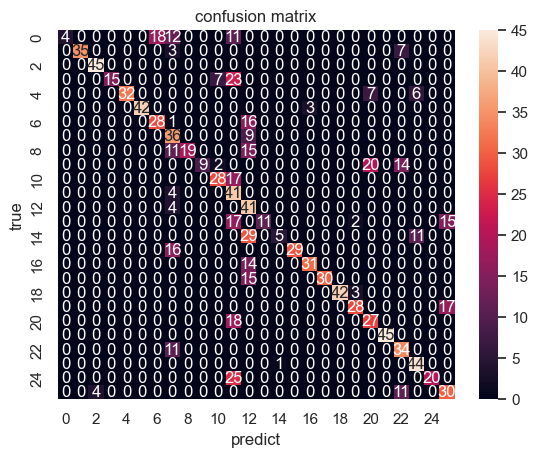

In [305]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
sns.set()
f,ax=plt.subplots()
y_true = tt
y_pred = re
C2= confusion_matrix(y_true, y_pred, labels=[0,1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
sns.heatmap(C2,annot=True,ax=ax) #画热力图

ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #y轴

In [306]:
scores = model.evaluate(X_valid,y_valid,verbose = 0)
print(scores)

[1.3672456741333008, 0.6418803334236145]
